Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

Визуализируйте продажи по дням.

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [1]:
import os
import pandas as pd

In [15]:
path = 'C:/Users/7101947/Desktop/project/Твой путь в мир Data Analytics/[freekurses.com] 4/[freekurses.com] Задания/Минипроект/data/data/'

In [92]:
df = pd.DataFrame()
for path1,dirs,files in os.walk(path):
    for file in files:
        p = f'{path1}/{file}'
        temp_df = pd.read_csv(p)
        
        p = p.split('/')[-2].split('\\')
        date = p[-2]
        name = p[-1]
        
        temp_df['date'] = date
        temp_df['name'] = name
        df = pd.concat((df,temp_df))
        print(df.shape)
 #       df = pd.read_csv(file)
 #       print(df.head())

(6, 5)
(11, 5)
(15, 5)
(18, 5)
(20, 5)
(22, 5)
(27, 5)
(33, 5)
(39, 5)
(42, 5)
(48, 5)
(50, 5)
(53, 5)
(55, 5)
(57, 5)
(59, 5)
(62, 5)
(68, 5)
(73, 5)
(77, 5)
(80, 5)
(84, 5)
(88, 5)
(94, 5)
(96, 5)
(97, 5)
(101, 5)
(103, 5)
(105, 5)
(109, 5)
(112, 5)
(115, 5)
(120, 5)
(126, 5)
(127, 5)
(132, 5)
(138, 5)
(143, 5)
(149, 5)
(150, 5)
(154, 5)
(155, 5)
(158, 5)
(161, 5)


In [103]:
df.reset_index(drop=True, inplace = True)

In [104]:
df

product_id  quantity        date              name
0            47         1  2020-12-03    Alexey_Smirnov
1            57         1  2020-12-03    Alexey_Smirnov
2            14         2  2020-12-03    Alexey_Smirnov
3            52         1  2020-12-03    Alexey_Smirnov
4             1         4  2020-12-03    Alexey_Smirnov
..          ...       ...         ...               ...
156          66         4  2020-12-09  Rostislav_Petrov
157          39         2  2020-12-09  Rostislav_Petrov
158          82         4  2020-12-09    Vasiliy_Ivanov
159          74         2  2020-12-09    Vasiliy_Ivanov
160          54         3  2020-12-09    Vasiliy_Ivanov

[161 rows x 4 columns]

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [127]:
df.groupby('name', as_index = False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False) 

name  quantity
3      Alexey_Smirnov        52
13       Petr_Smirnov        52
6       Anton_Smirnov        45
10       Petr_Fedorov        34
7      Kirill_Fedorov        28
16   Rostislav_Petrov        28
19     Vasiliy_Ivanov        27
0      Alexey_Fedorov        24
4        Anton_Ivanov        23
11        Petr_Ivanov        21
5        Anton_Petrov        18
9      Kirill_Smirnov        17
1       Alexey_Ivanov        17
17  Rostislav_Smirnov        17
14  Rostislav_Fedorov        16
18    Vasiliy_Fedorov        15
12        Petr_Petrov        14
8       Kirill_Petrov         9
15   Rostislav_Ivanov         9
2       Alexey_Petrov         7
20     Vasiliy_Petrov         7

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
top10 = df.groupby('product_id', as_index = False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

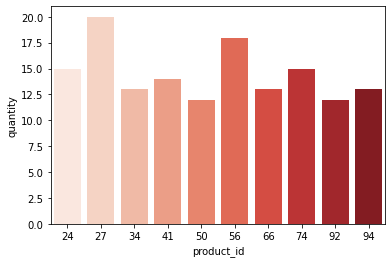

In [135]:
sns.barplot(data = top10, x = 'product_id', y = 'quantity', palette = 'Reds')

In [137]:
orders = df.groupby('date', as_index = False) \
    .agg({'quantity':'sum'})
orders

date  quantity
0  2020-12-03        60
1  2020-12-04       113
2  2020-12-05        61
3  2020-12-06        15
4  2020-12-07        94
5  2020-12-08        68
6  2020-12-09        69

<AxesSubplot:xlabel='date', ylabel='quantity'>

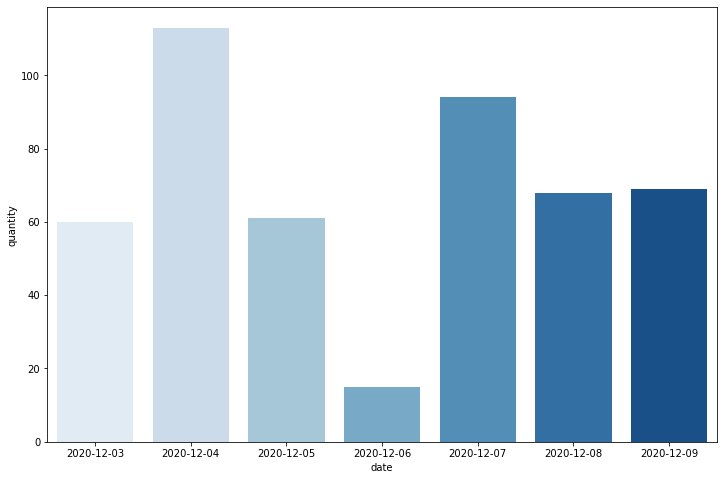

In [139]:
plt.figure(figsize = (12,8))
sns.barplot(data = orders, x = 'date', y = 'quantity', palette = 'Blues')

In [146]:
df.groupby(['name','product_id'],as_index=False)\
    .agg({'date': lambda x: x.nunique()})\
    .query('date>1')

name  product_id  date
37  Anton_Ivanov          15     2
92  Petr_Fedorov          94     2